# <center><font color='#262626'>Sells video games all over the world</font></center>

<center><img src="Joystick4.jpg"></center>

### Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [Part 1. General information](#Part_1)
    * [Conclusion](#Conclusion_Part_1)
<p> </p>     
* [Part 2. Preparation the data](#Part_2)
    * [Processing missing values](#Part2step1)
    * [Processing duplicates](#Part2step2)
    * [Conclusion](#Conclusion_Part_2)
<p> </p>    
* [Part 3. Exploratory Analysis](#Part_3)
    * [Conclusion](#Conclusion_Part_3)
<p> </p>    
* [Part 4. Test Hypotesis](#Part_4)
    * [Conclusion](#Conclusion_Part_4)
<p> </p>     
* [General Conclusion](#General_Conclusion)

## Project description <a class="anchor" id="Project_description"></a>

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.<br>

## Part 1. General information<a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

Let's load the libraries required for data manipulation and analysis.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np
#library of statistical functions
from scipy import stats as st
#import packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

The first step here is looking at the content of the data file.

In [2]:
#source of the data:
data = pd.read_csv("games.csv")

In [3]:
#structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Each entry in the file contains data about the game that is released on the platforms, its sales and ratings.

The data file contains 16715 rows and 11 columns of properties.<br>
The values in the Non-Null Count column indicate that there are missing values in the Name, Year_of_Release, Genre, Critic_Score, User_Score, and Rating columns.

**Data description.**
- **Name** - name of game
- **Platform** - game platforms and consoles
- **Year_of_Release** - year the game was released
- **Genre** - genre of game
- **NA_sales** - North American sales 
- **EU_sales** - sales in Europe
- **JP_sales** - sales in Japan
- **Other_sales** - sales in other countries
- **Critic_Score** - maximum score is 100
- **User_Score** - maximum score is 10
- **Rating** - score by ESRB

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.<br>
The sales fields are in millions of dollars.<br>
By definition, we have the wrong data type in the Year_of_Release column.

In [4]:
#10 rows for quickly testing dataset
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12503,The Next BIG Thing,PC,2011.0,Adventure,0.00,0.05,0.00,0.01,75.0,7.9,E10+
14591,Hot Pixel,PSP,2007.0,Puzzle,0.03,0.00,0.00,0.00,55.0,6.5,T
9952,Power Pro Kun Pocket 14,DS,2011.0,Sports,0.00,0.00,0.12,0.00,NaN,NaN,NaN
15485,XGRA: Extreme G Racing Association,XB,2003.0,Racing,0.02,0.00,0.00,0.00,66.0,6.8,T
16425,Ultraman Fighting Evolution 3,PS2,2004.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN


At first glance, the User_Score column should be a float. We will transform it below.

## Conclusion<a class="anchor" id="Conclusion_Part_1"></a>

The file contains historical data on sales of games released on various platforms and consoles. Therefore, data collected from open sources may be incomplete and contain anomalies.

However, the dataset is large enough, let's hope that the data is well distributed and does not contain intractable anomalies.

## Part 2. Preparation the data <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

Let's take a deeper look at the dataset.

In [5]:
#convert the field names to lowercase
data.columns = data.columns.str.lower()

Let's go through the fields and get rid of the missing values.

Each entry is a release of the game on the platform and sales revenue.<br>
Therefore, first of all, let's check values in the fields related by meaning:<br>
*Name, Platform, Year of Release, Genre*<br>

    Name             16713 non-null  object 
    Platform         16715 non-null  object 
    Year_of_Release  16446 non-null  float64
    Genre            16713 non-null  object 
    
Perhaps the dataset has duplicates for these values.

In [6]:
#find duplicates
data[data.loc[:,['name','platform','year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


We found duplicates and missing values at the same time.<br>
Let's remove duplicates and replace missing values for the console GEN. Since we do not know the name of the game and the genre, we will put the most common value by this platform in the Genre field, and replace the name of the game with the name of the platform.

In [7]:
#delete duplicates
data.drop_duplicates(subset=['name','platform','year_of_release'], inplace=True, keep='first')
#replace a missing value in Name
data.name.fillna(data['platform'], inplace= True)
#replace a missing value in Genre
data.genre.fillna('Platform', inplace= True)

In [8]:
#categorical values
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16713,16713,10013,9948
unique,11560,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3989


Now there are 16713 records in the dataset.<br>
In statistics for categorical variables, we see the User_score field. In addition to the missing data, we can see that most of the records are filled with "tbd", which means "to be determined". Let's explore it.

The data in this field must be float, but we cannot convert it because of the "tbd" values. Therefore, we will create a new field where we will transfer all the numerical values.

In [9]:
#create new column n_user_score float type
data['n_user_score']= data.loc[((data['user_score']!='tbd')&(data['user_score'].isnull()==False))]['user_score']
data['n_user_score']= data['n_user_score'].astype('float')

In [10]:
#basic statistical details
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,n_user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8136.000000,7589.000000
mean,2006.485101,0.263409,0.145076,0.077625,0.047348,68.965954,7.125260
std,5.876309,0.813647,0.503366,0.308871,0.186741,13.938153,1.499989
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


As we can see, the new field n_user_scores contains about 55% of missing values and the minimum value is 0, which is also an anomaly.<br>
We will use the same methods for filling, so we will replace 0 with Nan.

In [11]:
#replace 0 value to Nan
data.loc[(data['n_user_score']==0),'n_user_score'] = np.nan

Let's look at the games with the same name on other platforms and take the missing values from this group.

In [12]:
def get_missing_byname(row, v_field, v_agg):
    #the function returns a value from a group by name
    new_val= (data
              .loc[((data['name']==row['name'])& data[v_field].notnull())]
              .groupby('name')
              .agg({v_field : v_agg})
              )[v_field]
    
    if len(new_val)==0 : #if there's no value by group
        return np.nan
    else:
        return new_val.values[0]

In [13]:
#dataset with missing values
df= data.loc[(data['n_user_score'].isnull()==True)][['name']]

#user_score
df['n_user_score']= df.apply(lambda x: get_missing_byname(x, 'n_user_score', 'mean'), axis=1)
#update original dataset
data.update(df['n_user_score'])

In [14]:
def get_num_missing(v_field):
    #check a number of missing values in the column
    ratio= data[v_field].isnull().sum() / data.shape[0]
    return print(v_field +': Percentage of missing values: {:.1%}'.format(ratio))

In [15]:
get_num_missing('n_user_score')

n_user_score: Percentage of missing values: 48.0%


48% of missing values are still a lot. Fill in the remaining values with the average, grouping the data by platform and genre.

<div class="alert alert-warning" role="alert">
There's one alternative way, which is based on the assumption, that games with a certain user score have a mostly similar  critics score (you can check the correlations to see whether it's actually true or not). In order to make it more simple, you can normalize critic score to 0-10 scale instead of 0-100. And then you can just pick a certain game -- for example it misses critics score and you want to recover it by user score -- you look for games with similar user score (plus/minus 0.5 points) -- get an array of such games and then just simply take median value for critics score. Same goes for user score. 
<br>
</div>

In [16]:
def get_missing_by_platfgenre(row, v_field, v_agg):
    #the function returns a value from a group by platform and genre
    new_val= (data
             .loc[((data['platform']==row['platform'])&(data['genre']==row['genre'])
                  & data[v_field].notnull())]
             .groupby(['platform','genre'])
             .agg({v_field : v_agg})
             )[v_field]
    if len(new_val)==0 :  #if there's no value by group
        return np.nan
    else:
        return new_val.values[0]

Filling in missing "user score" values grouped by platform and genre.

In [17]:
#dataset with missing values
df= data.loc[(data['n_user_score'].isnull()== True)][['platform','genre']]
#user_score
df['n_user_score']= df.apply(lambda x: get_missing_by_platfgenre(x, 'n_user_score', 'mean'), axis=1)
#update original dataset
data.update(df['n_user_score'], overwrite=False)

#check a number of missing values in the column
get_num_missing('n_user_score')

n_user_score: Percentage of missing values: 2.5%


The remaining 2.5% will be excluded from the ratings statistics, because filling in the missing values for other criteria, for example, the mean score for the platform, will add uncertainty to the data.

In [18]:
data['n_user_score'].fillna(0, inplace=True)

Filling in missing "critics score" values grouped by name.

In [19]:
#dataset with missing values
df= data.loc[(data['critic_score'].isnull()==True)][['name']]

#critic_score
df['critic_score']= df.apply(lambda x: get_missing_byname(x, 'critic_score', 'mean'), axis=1)
#update original dataset
data.update(df['critic_score'], overwrite=False)

Filling in missing "critics score" values grouped by platform and genre.

In [20]:
#dataset with missing values
df= data.loc[(data['critic_score'].isnull()==True)][['platform','genre']]

#critic_score
df['critic_score']= df.apply(lambda x: get_missing_by_platfgenre(x, 'critic_score', 'mean'), axis=1)
#update original dataset
data.update(round(df['critic_score']), overwrite=False)

#check a number of missing values in the column
get_num_missing('critic_score')

critic_score: Percentage of missing values: 2.3%


The remaining 2.3% will be excluded from the ratings statistics on the same reason like User Score.

In [21]:
data['critic_score'].fillna(0, inplace=True)

Sometime the game is released on all consoles in the same year, which means we can also take the missed release year of the game from other platforms.

In [22]:
def get_missing_year(row, v_field, v_agg):
    #the function returns a value from a group by name and year_of_release
    new_val= (data
              .loc[((data['name']==row['name'])& data[v_field].notnull())]
              .groupby(['name','year_of_release'])
              .agg({v_field : v_agg})
              )[v_field]
    
    if len(new_val)== 1 :  #if there's 1 value by group
        return new_val.values[0]
    else: 
        return np.nan

In [23]:
#year_of_release
#dataset with missing values
df= data.loc[(data['year_of_release'].isnull()==True)][['name']]
#year_of_release
df['year_of_release']= df.apply(lambda x: get_missing_year(x, 'year_of_release', 'first'), axis=1)
#update original dataset
data.update(df['year_of_release'], overwrite=False)

In some games, the release year is indicated in the name. Let's take it from there to fill in the missing values.

In [24]:
def get_digits2(text):
    return ''.join(filter(lambda x: x.isdigit(), text))

df = data[data['year_of_release'].isnull()==True]['name'].apply(lambda x: get_digits2(x))
data['year_of_release'].update(df[df.apply(lambda x: len(x)==4)])

#check a number of missing values in the column
get_num_missing('year_of_release')

year_of_release: Percentage of missing values: 0.9%


Filling in the rating according to the rating of this game from other platforms.

In [25]:
#rating
#dataset with missing values
df= data.loc[(data['rating'].isnull()==True)][['name']]
#rating
df['rating']= df.apply(lambda x: get_missing_byname(x, 'rating', 'first'), axis=1)
#update original dataset
data.update(df['rating'])

#check a number of missing values in the column
get_num_missing('rating')

rating: Percentage of missing values: 37.9%


Let's take the most common rating.

In [26]:
data['rating'].value_counts()

E       4150
T       3094
M       1653
E10+    1470
EC        10
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [27]:
data['rating'].fillna('E', inplace=True)

'E' is a label 'Everyone' by The Entertainment Software Rating Board.

The dataset has multiple records without any sales or ratings information. Let's delete them as anomalous.

In [28]:
#no sales
data.drop(data[(data['na_sales']==0)&(data['eu_sales']==0)&(data['jp_sales']==0)&(data['other_sales']==0)].index
         ,inplace=True)

**The final dataset.**

Since our task is related to the analysis of the activity of various platforms over time, entries without a year of release of games on platforms can be deleted. There are few of them and they can introduce errors into the analysis.

In [29]:
#a new dataset
df_games = data[data['year_of_release'].isnull()==False].copy()
#convert type of year_release to integer (by meaning)
df_games['year_of_release']= df_games['year_of_release'].astype('int')

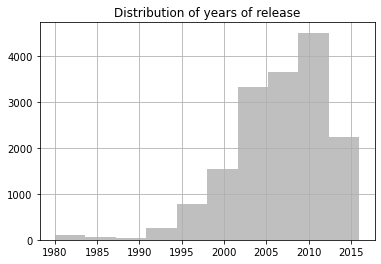

In [30]:
#the distribution of release years
plt.title("Distribution of years of release"); 
df_games['year_of_release'].hist(color='0.75');

Game release dates are distributed to the left.<br>
This is not an anomaly, but the normal behavior of historical data. I will not remove the outlier in order to find the appropriate patterns during analysis. And I will reduce the dataset later to make a prediction.

Adding a new column with total sales.

In [31]:
#new column
df_games['total_sales']= df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

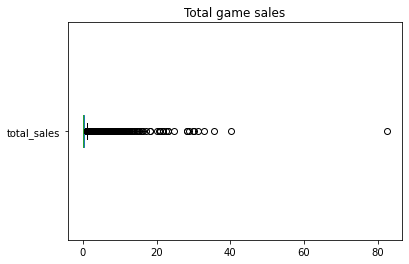

In [32]:
#the distribution of total_sales
plt.title("Total game sales"); 
df_games['total_sales'].plot(kind='box', vert=False);

In [33]:
df_games[df_games['total_sales']>60]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,n_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,82.54


Wii Sports was a super popular game in 2006 and broke all sales records in North America and Europe. For our analysis, this is a clear outlier, because it can affect the results. We will leave the rest of the outliers as historical data.

In [34]:
#delete Wii Sport 2006
df_games.drop(0, inplace=True)

In [35]:
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,n_user_score,total_sales
count,16561.000000,16561.000000,16561.000000,16561.000000,16561.000000,16561.000000,16561.000000,16561.000000
mean,2006.491395,0.261525,0.144136,0.077822,0.047094,66.764067,6.962454,0.530577
std,5.863581,0.751536,0.453193,0.308791,0.175794,15.134288,1.604622,1.418023
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.000000,6.539379,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.000000,7.200000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,75.000000,7.847059,0.470000
max,2016.000000,29.080000,12.760000,10.220000,10.570000,98.000000,9.700000,40.240000


## Conclusion <a class="anchor" id="Conclusion_Part_2">

The original dataset contains the release, sales, and rating records of games across various consoles and platforms. Data from 1980 to 2016.

The rating information is incomplete and may require additional steps when performing the analysis.
When examining the dataset, we encountered the following errors: duplicate data, missing values, values that should have been determined, but were not filled in, abnormal values.<br>
The dataset contains historical data, perhaps it was collected from various places that became the source of the error.

Incomplete definition.<br>
We found incomplete data in the name of the games - this is data from 1993, some kind of a platform video game. Incomplete data was in the years of the game's release. Some values could be recovered from data from other consoles and platforms, but 0.9% of the entries were excluded from the statistics.

Fields with ratings were considered separately.<br>
The rating is ordinal data and refers to quantities that have a natural ordering. Therefore, we can calculate the mean, median or mode of the feature and replace missing values. This is an approximation which can add variance to the data set.<br>
The two fields User Score and Critic Score contain numeric values, which made it possible to replace the missing values with the mean value for the console (platform) and genre. The Rating column contains labels of The Entertainment Software Rating Board. This is a categorical variable, so we used the most common value E (Everyone) to fill in the missing values. However, some records were excluded from the statistics in order not to add ambiguity to the data.

The final dataset has 16572 records. A column with information on total sales has been added to the dataset.

## Part 3. Analyze the data<a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

- *Look at how many games were released in different years. Is the data for every period significant?*

In [36]:
#prepare the data for plotting
#dataset of released games
df = df_games[['year_of_release','name']].groupby('year_of_release').count().reset_index()

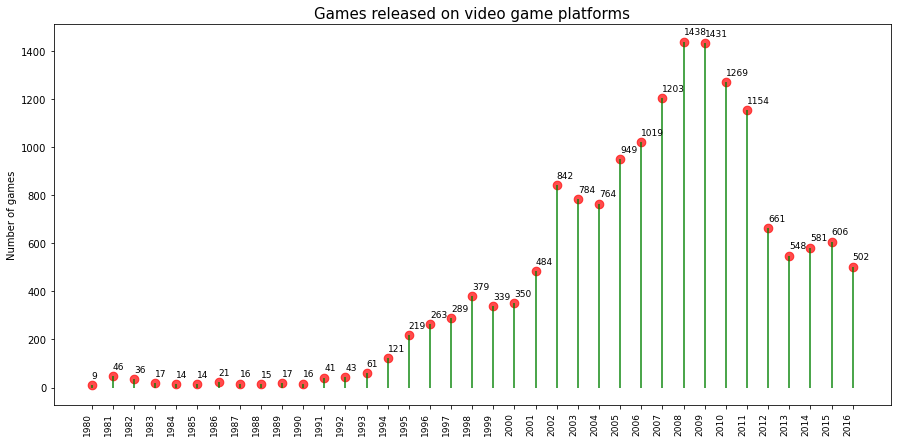

In [37]:
#lolipop graph
fig,ax = plt.subplots(figsize=(15,7))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='red', alpha=0.7);
#params
ax.set_title('Games released on video game platforms', fontdict={'size':15});
ax.set_ylabel('Number of games');
ax.set_xticks(df.year_of_release);
ax.set_xticklabels(df.year_of_release, rotation=90
                   , fontdict={'size':9, 'horizontalalignment':'right'});
#precise values
for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2), fontsize=9)

The first game consoles appeared in 1967 and since then their popularity has increased. Our sample presents data from 1980, when two generations of game consoles and platforms were already released.<br>
Until 1994, game consoles were expensive devices and there were not many games released.<br> 
Since 1994, the fifth generation of devices has appeared and their popularity has gone up. The peak of popularity was in 2008-2009.<br>
In the 2010s,with the increasing prevalence of technology and the Internet in everyday life, the popularity of video consoles began to decline. In 2012, the number of games released was half that of the previous year. Until 2016, the level remains around 600 released games per year. (In our sample, 2016 data may be incomplete)

The next task:
- *Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?*

In [38]:
#prepare the data for plotting
#dataset of total sales by platforms
df_totalsales= df_games.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales')
print('Number of platforms (consoles) in sample:',df_totalsales.shape[0])

Number of platforms (consoles) in sample: 31


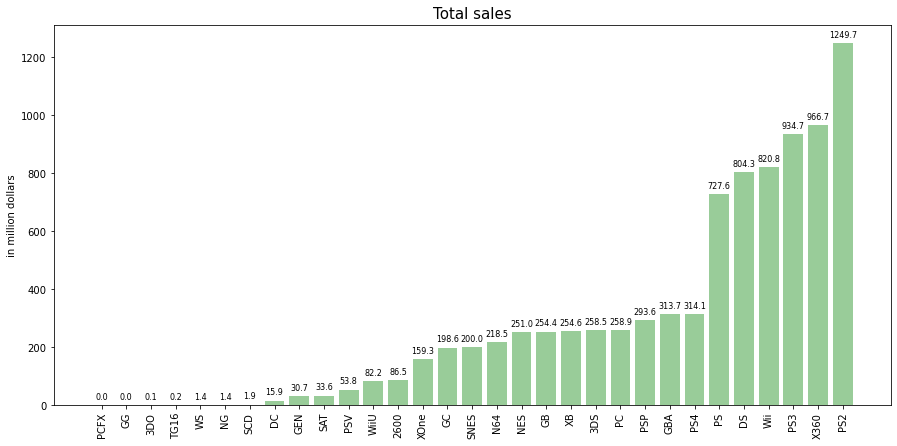

In [39]:
#barplot graph
#params
fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot()
ax.set_title('Total sales', fontdict={'size':15});
ax.set_ylabel('in million dollars');
xn= range(df_totalsales.shape[0])

x= df_totalsales.index
y= df_totalsales.total_sales
for x_, y_ in zip(x, y):
    ax.bar(x_, y_, color = "green", alpha = 0.4, );
    ax.text(x_, y_ + 20, round(y_, 1), horizontalalignment = 'center', fontsize=8)
plt.xticks(np.arange(min(xn), max(xn)+1), x, rotation='vertical');

In the graph above, we saw that with the evolution of consoles, the number of games released is increasing. However, among the most profitable consoles we see the PS2 console - the sixth generation of video game consoles. It is far ahead of competitors in terms of profitability.<br>
Let's take a closer look at the PS2 data.

In [40]:
#prepare the data for plotting
#dataset of total sales by platforms
df= (df_games
     .loc[(df_games['platform']=='PS2'),['year_of_release', 'total_sales']]
     .groupby('year_of_release').sum()
     .sort_values('year_of_release').reset_index()
    )
#standarize the data
df['z_sales']= (df['total_sales'] - df['total_sales'].mean())/df['total_sales'].std()

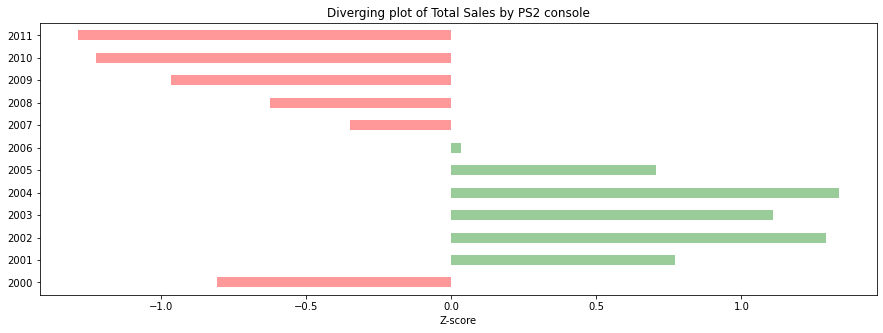

In [41]:
#divergent graph
#create a color list, where if value is above > 0 it's green otherwise red
colors= ["red" if x < 0 else "green" for x in df['z_sales']]

#instanciate the figure
plt.figure(figsize= (15, 5))
plt.hlines(y= df['year_of_release'], xmin=0, xmax=df['z_sales'], color=colors, alpha=0.4, linewidth=10);
plt.yticks(df.year_of_release);

#params
plt.xlabel('Z-score')
plt.title('Diverging plot of Total Sales by PS2 console');

Z-score is a statistical measurement of a score's relationship to the mean in a group of scores. A positive Z-score says the data point is above average. A negative Z-score says the data point is below average.<br>
As we can see, the heyday of the life cycle of the PS2 console came from 2001 to 2005.

- _Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?_

In [42]:
#prepare the data for plotting
#dataset of total sales by platforms and years
df_yearsales= pd.pivot_table(df_games, index='year_of_release', columns='platform', values='total_sales'
                   , aggfunc='sum', fill_value=0).T
#dynamics of life of platforms and consoles
#dinamics = (df - df.shift(+1)).T

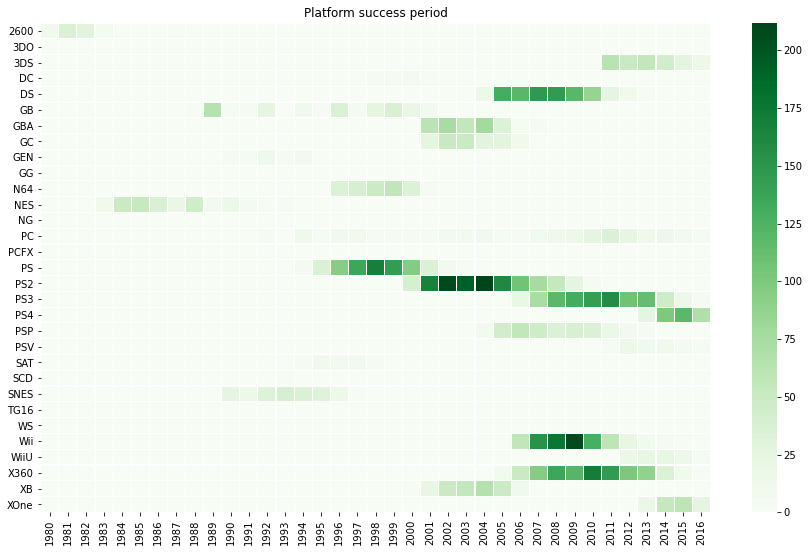

In [43]:
#instanciate the figure
fig, ax = plt.subplots(figsize= (15, 9))
sns.heatmap(df_yearsales, cmap="Greens", linewidths=.1).set_title("Platform success period");
ax.set_ylabel('');    
ax.set_xlabel('');

It is interesting to note that cycle of successful platform life is 5 years. Even such a super popular console as the PS2, in 2006, significantly lost ground. Maybe this is due to the release of new consoles or with the rapid development of technology or successful marketing moves. Anyway, 5 years is the point of success.

- _How many platforms were successful in our sample and have zero sales by 2015?_

In [44]:
#the mean value by total sales of platmorms
totalsales_mean = round(df_totalsales['total_sales'].mean(), 1)
print("The mean of game total sales:", totalsales_mean)

The mean of game total sales: 283.4


Let's select those whose sales were above average.

In [45]:
#successful platforms
df1 = df_totalsales[(df_totalsales['total_sales']>=totalsales_mean)].reset_index()
print('Number of platforms with above average income:', df1.shape[0])

Number of platforms with above average income: 9


In [46]:
#alive platforms in 2015 and later
df2 = df_games[(df_games['year_of_release']>=2015)].groupby('platform').agg({'name':'count'}).reset_index()

#the platforms that used to be popular but now have zero sales
df3 = pd.merge(df1, df2, on=['platform', 'platform'], how='left')
df3.loc[(df3['name'].isnull()==True)][['platform']].reset_index(drop=True)

,platform
0,GBA
1,PS
2,DS
3,PS2


Game Boy Advance(GBA), PlayStation (PS), Nintendo DS and PlayStation 2 (PS2) were dropped out of the game.

- _How long does it generally take for new platforms to appear and old ones to fade?_

In [47]:
#prepare the data for plotting
#dataset of total sales by platforms and years
df= pd.pivot_table(df_games, index='platform', columns='year_of_release', values='total_sales'
                   , aggfunc='sum')

In [48]:
#improvement for visualization
df = df_yearsales* (-1)
df.fillna(0, inplace=True)

#define the sorter
sorter = ['2600', 'NES', 'GB', 'SNES', 'GEN', 'SAT', 'PS', 'PC', 'N64', 'DC',
          'PS2', 'GBA', 'GC', 'XB', 'DS', 'PSP', 'X360', 'PS3', 'Wii',
          '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']

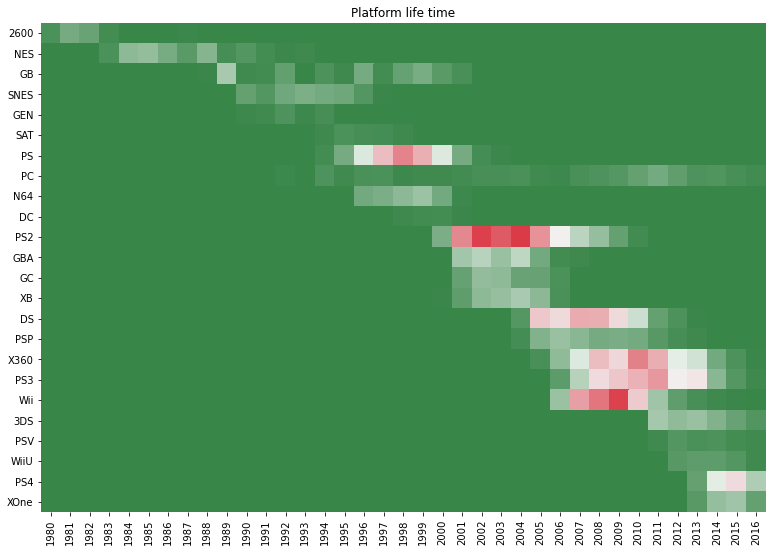

In [49]:
#plotting
fig, ax = plt.subplots(figsize= (13, 9))
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(df.loc[sorter], cmap=cmap, cbar=False).set_title("Platform life time");
ax.set_ylabel('');    
ax.set_xlabel('');

In [50]:
#The average platform lifetime
#exclude PC console as outlier
lifetime_mean= pd.pivot_table(df_games[df_games['platform']!='PC']
                   , index='platform', columns='year_of_release', values='total_sales'
                   , aggfunc='sum').count(axis=1).mean()
print('The average platform lifetime is',round(lifetime_mean),'years')

The average platform lifetime is 7 years


In [51]:
#The average number of platform per year
#exclude PC console as outlier
lifetime_mean= pd.pivot_table(df_games[df_games['platform']!='PC']
                   , index='platform', columns='year_of_release', values='total_sales'
                   , aggfunc='sum').count(axis=1).mean()
print('The average number of platforms in a year is',round(lifetime_mean))

The average number of platforms in a year is 7


A graphical representation of data shows us that since 2001 successful platforms appear on average every 5 years, the average platform life cycle is 7 years, the average number of platforms active during the year is 7.

For further analysis, let's reduce the dataset and take data from 2010. This is a little more than the average platform lifespan according to the dataset and will help to see those platforms that have finished their journey and those that have replaced them.

- _Are differences in sales significant?_

When comparing the diagrams, we can conclude that until 1994 the consoles produced had a long life cycle and brought in average income. In 1994, three platforms PC, PS and SAT appeared.<br>
However, the PlayStation (PS) was the first computer entertainment platform. This contributed to a significant jump in sales. In addition, Sony did not stop at this version of the console for a long time and five years later released a new version - PS2. The PS2 platform was even more successful. Further, the dynamics are similar to the story with the PlayStation.<br>
As the chart shows, the quick release of a new version of the console plays a significant role in high sales.

In [52]:
df_final= df_games[df_games['year_of_release']>=2010]

- _Which platforms are leading in sales?_

In [53]:
#leading in sales
df= df_final.groupby('platform')[['total_sales']].mean()
df.nlargest(5,'total_sales')

,total_sales
platform,
PS4,0.801378
X360,0.799639
PS3,0.656997
XOne,0.645020
WiiU,0.559116


PS3 and X360 consoles are unconditional leaders, their income is almost twice as high as other leaders.

- _Which ones are growing or shrinking?_

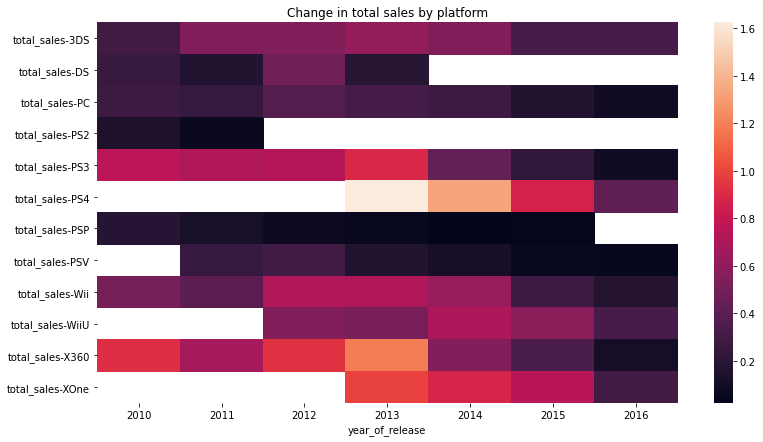

In [54]:
#total sales distribution
#dataset
df= pd.pivot_table(df_final, index=['year_of_release'], columns=['platform'], 
                   values=['total_sales'], aggfunc='mean')
#plotting
fig, ax = plt.subplots(figsize= (13, 7))
sns.heatmap(df.T).set_title("Change in total sales by platform");
ax.set_ylabel('');    
ax.set_xlabel('year_of_release');

There is the following dynamic here:<br>
PS2 ended in 2011 the same year PSV released<br>
Wii U in 2012 started selling<br>
DS ended in 2013, XBOX One and PS4 launched the same year<br>
PSP ended in 2015<br>
From 2013 to 2015, 10 consoles were active per year.

The next task is:<br>
- _Select several potentially profitable platforms._

For this, we will select the last two years and see the dynamics of sales.<br>
For the graph, we use the median, because the total sales  distribution give us a skewed graph and we have to be sure of the dynamics.

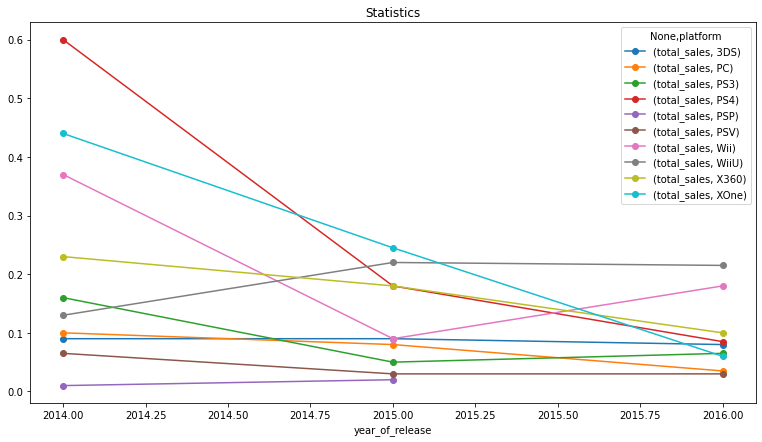

In [55]:
#total sales median
(
    pd.pivot_table(df_final.loc[(df_final['year_of_release']>=2014)]
                   , index=['year_of_release'], columns=['platform']
                   , values=['total_sales'], aggfunc='median')
).plot(style='o-', title='Statistics', figsize=(13, 7));

There is the following dynamic here:<br>
Wii U raised sales, Wii raised sales again, PS3 raised also, 3DS move constantly.

Let's build a box plot for the global sales of all games by platform and find .

In [56]:
#sorting
sorter = df_final.groupby(['platform'])[['total_sales']].sum().reset_index()
sorter = sorter.sort_values('total_sales')['platform']

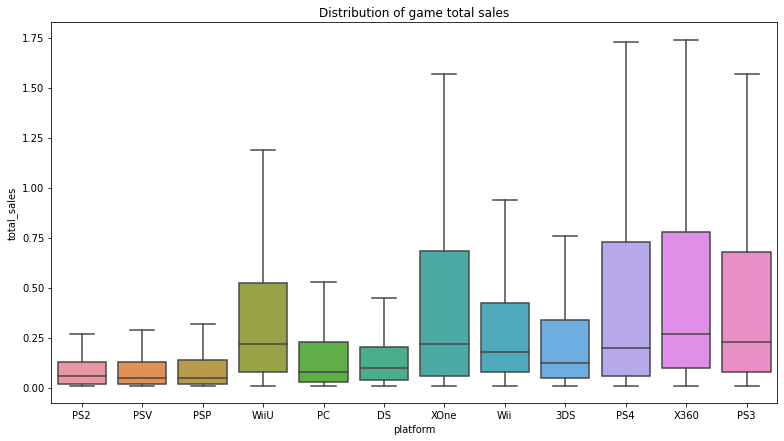

In [57]:
#plotting
plt.figure(figsize=(13,7))
ax = sns.boxplot(x='platform', y='total_sales', data=df_final, order=sorter, showfliers=False);
ax.set_title('Distribution of game total sales');

We can see here how our data is spread out.<br> 
XOne, PS4, X360 and PS3 have the same kind of distribution. The others show very different distributions of views.

- _What about average sales on various platforms?_

In [58]:
#prepare the data for plotting
#dataset of total sales by platforms and years
df_events= df_final.groupby('platform').agg({'name':'count','total_sales':'sum'})
df_events.columns= ['Count_Of_Games','Total_Sales']

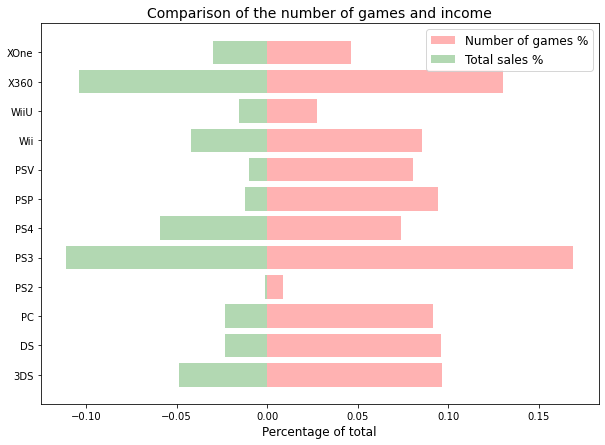

In [59]:
#plotting
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
#data
ax.barh(df_events.index
        , df_events['Count_Of_Games']/df_final.shape[0] #ratio
        , color = "red", alpha = 0.3, label = "Number of games %");
ax.barh(df_events.index
        , -df_events['Total_Sales']/df_final.shape[0]   #ratio
        , color = "green", alpha = 0.3, label = "Total sales %");
#params
ax.legend(loc = "upper right", fontsize = 12);
ax.set_xlabel("Percentage of total", fontsize = 12);
ax.set_title("Comparison of the number of games and income", fontsize = 14);

The chart shows us that platforms with average high sales also have a large number of games on the platform.

Now, let's take a look at how user and professional reviews affect sales for the Nintendo 3DS. It was announced in March 2010, so we have all the data in our reduced dataset. Let's see relationships.

In [60]:
def make_plot(column, title, color):
    #the function makes plot line
    
    #dataset of Nintendo 3DS
    df = df_final.loc[((df_final[column]>0)&(df_final['platform']=='3DS')), [column,'total_sales']]
    #scatter plot
    sns.regplot(x=df[column], y=df["total_sales"], color=color
            , line_kws={"color":"r","alpha":0.7,"lw":5}).set_title(title);

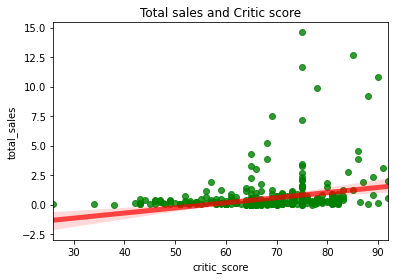

In [61]:
make_plot("critic_score","Total sales and Critic score", "green")

The graph shows a weak and positive correlation between the total amount of sales and critic scores.

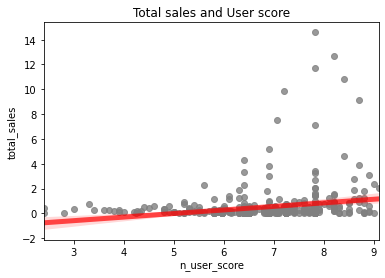

In [62]:
make_plot("n_user_score","Total sales and User score", "grey")

The graph shows weak positive correlation between the total amount of sales and user scores.

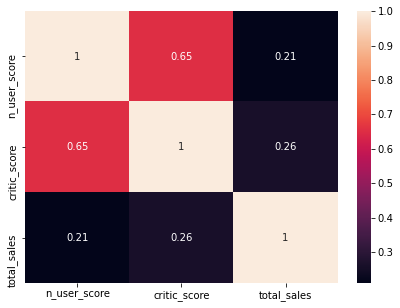

In [63]:
#correlation matrix
corrMatrix = df_final.loc[((df_final['critic_score']>0)&(df_final['n_user_score']>0)&(df_final['platform']=='3DS'))
                          ,['n_user_score','critic_score','total_sales'] ].corr()
#heatmap chart
plt.figure(figsize=(7,5))
sns.heatmap(corrMatrix, annot=True);

The correlation matrix also shows a weak and positive correlation between the total amount of sales and user and critic scores.<br>
Perhaps this is only for this 3DS platform. Let's take a look at other consoles.

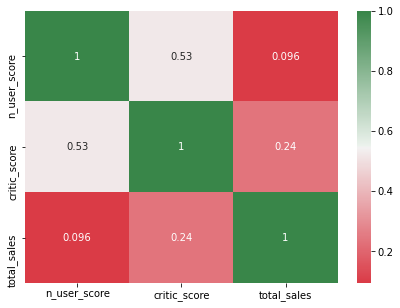

In [64]:
#correlation matrix
corrMatrix = df_games.loc[((df_games['critic_score']>0)&(df_games['n_user_score']>0))
                          ,['n_user_score','critic_score','total_sales'] ].corr()
#heatmap chart
plt.figure(figsize=(7,5))
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(corrMatrix, cmap=cmap, annot=True);

The correlation matrix based on the data of the entire dataset shows that for platforms and consoles the correlation with the ratings of the reviewers is higher than with the ratings of the user.

Now the next task:<br>
- _Take a look at the general distribution of games by genre._

First, let's see the distribution by genre for the entire period.

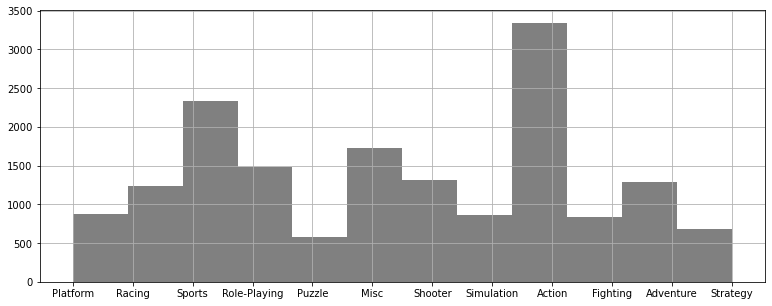

In [65]:
#histogram by main dataset
df_games['genre'].hist(figsize=(13,5), color='grey', bins=12);

In [66]:
#profit by main dataset
df_genre= df_games.groupby('genre').agg({'total_sales':'median'})
df_genre.sort_values('total_sales', ascending=False).head()

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19


It's worth noting that Action, Sport and Misc games are leading in terms of the number of games released. But Platform, Shooter and Sports genres are leading in terms of profit.<br>
Now let's look at the distribution in a reduced sample from 2010.

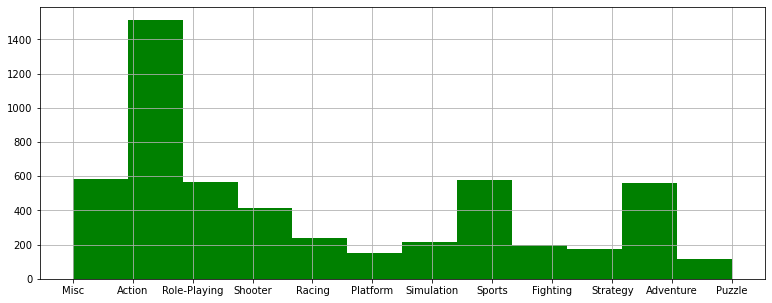

In [67]:
#histogram by reduced sample
df_final['genre'].hist(figsize=(13,5), color='green', bins=12);

In [68]:
#profit by reduced sample
df_genre= df_final.groupby('genre').agg({'total_sales':'median'})
df_genre.sort_values('total_sales', ascending=False).head()

,total_sales
genre,
Shooter,0.380
Platform,0.210
Sports,0.200
Fighting,0.180
Racing,0.165


As we can see, Action, Sport and Misc games continue to lead by the number of games released, but Shooter, Platform and Sports genres bring income.

The results obtained indicate two trends in the release of games for platforms and consoles - a large number of inexpensive games of a popular genre or a small number of games, but which bring a large income through content, advertising, etc.

### Conclusion.

To summarize, we can say that we saw how the era of home video consoles began with devices, with a small number of games that brought significant income and led to the rapid development of this market. We have seen a trend towards an increase in the number of games produced, with a peak in 2008-2009. The undoubted star among consoles remains the PS2. Comparing the consoles, we saw that the lifespan of the console is an average of 7 years, of which a period of 5 years shows significant growth, peak sales and decline. We have determined that since 2010 there are about 10 video consoles on the market at the same time and the number of games on them is decreasing, but the profit is shown to be high, which means that sales within games have increased. <br>
The data showed a weak correlation between sales and ratings from reviewers and users.<br>
We have determined that, on average, game sales generate 283.4 million dollars and the bulk of revenue from games in the Shooter, Platform and Sports genres.

**A user profile for each region**

For each region (NorthAmerica, Europe, Japan), determine:
- The top five platforms.

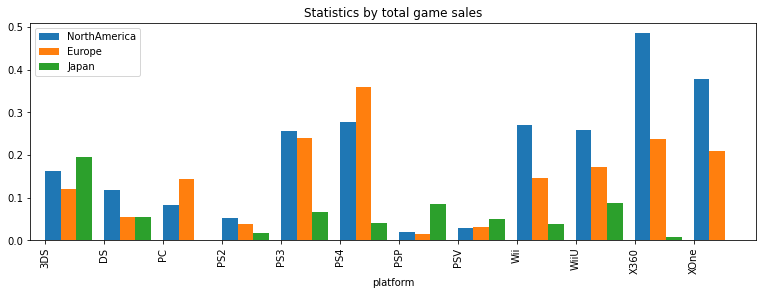

In [69]:
#dataset for plotting
df_profile= (
    df_final
    .groupby(['platform'])
    .agg({'na_sales':'mean','eu_sales':'mean','jp_sales':'mean'})
)
#rename columns
df_profile.columns= ['NorthAmerica','Europe','Japan']
#plotting
#profiles of regions
df_profile.plot(kind='bar', title='Statistics by total game sales', figsize=(13, 4), position=0,  width=0.8);

The top five platforms:<br>
NorthAmerica - X360, PS3, Wii, PS4, XOne<br> 
Europe - PS4, PS3, X360, Wii, XOne<br>
Japan - 3DS, PSP, PS3, DS, Wii

The distribution chart shows that the popularity of consoles in Japan differs from that in Europe and North America.

- The top five genres

In [70]:
#dataset for plotting
#profiles by regions
df_na= df_final[df_final['na_sales']>0].groupby(['genre']).agg({'na_sales':'count'})
df_eu= df_final[df_final['eu_sales']>0].groupby(['genre']).agg({'eu_sales':'count'})
df_jp= df_final[df_final['jp_sales']>0].groupby(['genre']).agg({'jp_sales':'count'})
#merge regions
df_profile = df_na.merge(df_eu, left_index=True, right_index=True, how='outer')
df_profile = df_profile.merge(df_jp, left_index=True, right_index=True, how='outer')
#rename columns
df_profile.columns= ['NorthAmerica','Europe','Japan']
#mean
df_profile = df_profile/df_final.shape[0]

In [71]:
df_profile.sort_values('NorthAmerica', ascending=False)[['NorthAmerica']].head()

,NorthAmerica
genre,
Action,0.183612
Sports,0.077805
Misc,0.070288
Shooter,0.070100
Role-Playing,0.055441


In [72]:
df_profile.sort_values('Europe', ascending=False)[['Europe']].head()

,Europe
genre,
Action,0.190566
Sports,0.072919
Shooter,0.067093
Misc,0.058636
Role-Playing,0.053749


In [73]:
df_profile.sort_values('Japan', ascending=False)[['Japan']].head()

,Japan
genre,
Action,0.138320
Role-Playing,0.086074
Adventure,0.072543
Misc,0.037023
Shooter,0.030821


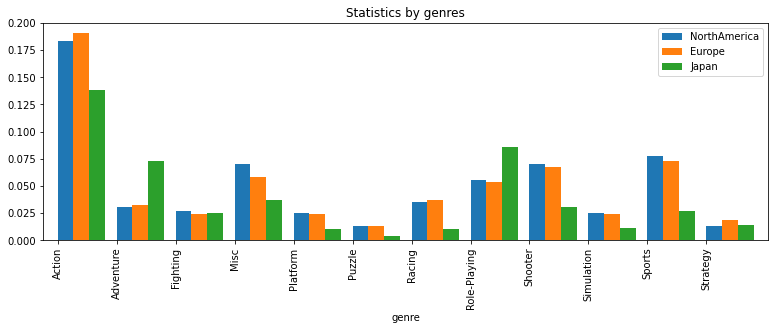

In [74]:
##plotting
#profiles of regions
df_profile.plot(kind='bar', title='Statistics by genres', figsize=(13, 4), position=0,  width=0.8);

The chart shows that North America and Europe are in step with each other. Japan joins them in the Action genre, but at the same time prefers Role-Playing and Adventure genres more and Sport genre less.

- Do ESRB ratings affect sales in individual regions?

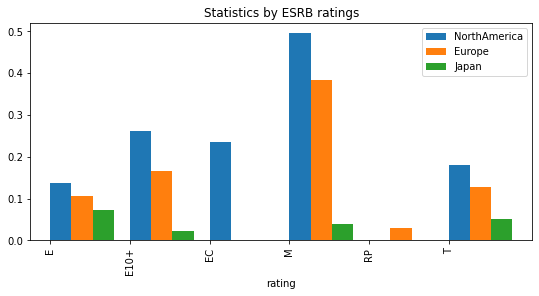

In [75]:
#dataset for plotting
df_profile= (
    df_final
    .groupby(['rating'])
    .agg({'na_sales':'mean','eu_sales':'mean','jp_sales':'mean'})
)
#rename columns
df_profile.columns= ['NorthAmerica','Europe','Japan']
#plotting
#profiles of regions
df_profile.plot(kind='bar', title='Statistics by ESRB ratings', figsize=(9, 4), position=0,  width=0.8);

The Entertainment Software Rating Board assigns an age rating to games. Our chart shows that M (Mature 17+) rank games generated the highest revenue in North America and Europe. In Japan, T (Teen) and E (Everyone) games are more profitable.

Conclusion.

The region profiles showed different behavioral trends. However, Europe and America more often have similar patterns among themselves than with Japan.

## Part 3. Test hypotheses. <a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

*Hypothesis test 1*

The null hypothesis H₀ is always stated with an equal sign, so:<br>
H₀ - the average user ratings of the Xbox One and PC platforms are equal.

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁ - the average user ratings of the Xbox One and PC platforms are differ.

The significant level = 0.05

In order to test a hypothesis that the means of the two statistical populations are equal based on samples taken from them, we will apply a scipy.stats.ttest_ind method. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [76]:
def ttest(sample_1, sample_2):
    alpha = .05 #The significant level

    results = st.ttest_ind(
            sample_1, 
            sample_2,
            equal_var=False #perform Welch’s t-test
    )

    #if the p-value is less than alpha, we reject the hypothesis
    print('p-value: ', results.pvalue)
 
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [77]:
#Average user ratings of the Xbox One
list_1 = df_games.loc[((df_games['platform']=='XOne')&(df_games['n_user_score']>0))]['n_user_score'].tolist()
#Average user ratings of the PC
list_2 = df_games.loc[((df_games['platform']=='PC')&(df_games['n_user_score']>0))]['n_user_score'].tolist()
ttest( list_1, list_2)

p-value:  4.953353974843672e-06
We reject the null hypothesis


The p-value shows less than 1% probability of a null hypothesis.<br>
Let's check our results.

In [78]:
print('Mean of user rating')
print('XOne console:'
      , df_games.loc[((df_games['platform']=='XOne')&(df_games['n_user_score']>0))]['n_user_score'].mean())
print('PC console  :'
      , df_games.loc[((df_games['platform']=='PC')&(df_games['n_user_score']>0))]['n_user_score'].mean())

Mean of user rating
XOne console: 6.653986903449379
PC console  : 7.082601383229433


*Hypothesis test 2*

The null hypothesis H₀ is always stated with an equal sign, so:<br>
H₀ - the average user rating for the Action and Sports genres are equal.

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁ - the average user rating for the Action and Sports genres are differ.

The significant level = 0.05

We will apply a scipy.stats.ttest_ind method here as well.

In [79]:
#the average user rating for the Action
list_1 = df_games.loc[((df_games['genre']=='Action')&(df_games['n_user_score']>0))]['n_user_score'].tolist()
#the average user rating for the Sports
list_2 = df_games.loc[((df_games['genre']=='Sports')&(df_games['n_user_score']>0))]['n_user_score'].tolist()
ttest( list_1, list_2)

p-value:  0.3123036283560416
We can't reject the null hypothesis


The p-value shows 31% probability of a null hypothesis.<br>
Let's check our results.

In [80]:
print('Mean of user rating')
print('Action genre:'
      , df_games.loc[((df_games['genre']=='Action')&(df_games['n_user_score']>0))]['n_user_score'].mean())
print('Sports genre:'
      , df_games.loc[((df_games['genre']=='Sports')&(df_games['n_user_score']>0))]['n_user_score'].mean())

Mean of user rating
Action genre: 7.046899371527939
Sports genre: 7.08131519551426


## General conclusion<a class="anchor" id="General_conclusion"></a>
[Go back to the Contents](#contents)

This book provides an analysis of historical data for gaming on home video consoles and platforms. The data is collected from open source, therefore it has a large amount of missing data.
For the most part, data has been saved, missing values have been filled in, and anomalous values have been deleted.
The dataset contains historical data and the skewed data distribution, so the median is often used in calculations.

This book provides an analysis of historical data for gaming on home video consoles and platforms. The data is collected from open source, therefore it has a large amount of missing data.<br>
For the most part, data has been saved, missing values have been filled in, and anomalous values have been deleted.<br>
The dataset contains historical data and the skewed data distribution, so the median is often used in calculations.

Analysis showed that when planning to launch a new console, consider the following:
- The average console life cycle is 7 years. A successful strategy was to release a new version of the console at the end of this period.
- The average time of active sales and maximum profit is 5 years.
- For successful sales, it is reasonable to provide a sufficient number of games on the console and use in-game sales
- When planning games, it is necessary to take into account the popular genres that bring the greatest income - Platform, Shooter, Sports, Action. In this case, it is necessary to take into account the region of the game being launched. Role-Playing and Adventure games are relevant for Japan.
- When certifying according to ESRB, you need to keep in mind that games with rank M (Mature 17+) for Europe and America and E (Everyone) and T (Teen) for Japan bring more income.
- Game user ratings have little impact on sales. The rating of the reviewers influences sales to a greater extent, but also insignificantly.